### Count the number of lines in Python for each file

In [38]:
!wc -l searches.csv
!wc -l bookings.csv

20390198 searches.csv
10000011 bookings.csv


### number of lines:
#### 20390198 lines searches.csv
#### 10000011 lines bookings.csv


## Exercise 2

Top 10 arrival airports in the world in 2013 
(using the bookings file)
Arrival airport is the column arr_port. It is the IATA code for the airport.
To get the total number of passengers for an airport, you can sum the column pax, grouping by arr_port. Note that there is negative pax. 
That corresponds to cancelations. So to get the total number of passengers that have actually booked,
you should sum including the negatives (that will remove the canceled bookings).
Print the top 10 arrival airports in the standard output, including the number of passengers.
Bonus point: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at GeoBases in Github)•Bonus point: Solve this problem using pandas (instead of any other approach)

## Ex 2

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [40]:
!ls

AAF_solution_1to4.ipynb  Datachallenge.ipynb  ex_04-full.ipynb
bookings.csv		 DS_Challenge.pdf     ex_05-full.ipynb
bookings.csv.bz2	 ex_01-full.ipynb     searches.csv
bookingshead15.csv	 ex_02-full.ipynb     searches.csv.bz2
bookings_unique.csv	 ex_03-full.ipynb     searches_unique.csv


In [41]:
file = '/home/dsc/Documents/Data Science Challenge/bookings.csv'
df=pd.read_csv('/home/dsc/Documents/Data Science Challenge/bookings.csv',nrows = 9999, delimiter='^')

In [42]:
df.head(5)

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKL,AKL,NZ,SVO,MOW,RU,AKLSVO,AKLMOW,NZRU,1,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKLSVO,AKLMOW,NZRU,1,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [43]:
list(df.columns)

['act_date           ',
 'source',
 'pos_ctry',
 'pos_iata',
 'pos_oid  ',
 'rloc          ',
 'cre_date           ',
 'duration',
 'distance',
 'dep_port',
 'dep_city',
 'dep_ctry',
 'arr_port',
 'arr_city',
 'arr_ctry',
 'lst_port',
 'lst_city',
 'lst_ctry',
 'brd_port',
 'brd_city',
 'brd_ctry',
 'off_port',
 'off_city',
 'off_ctry',
 'mkt_port',
 'mkt_city',
 'mkt_ctry',
 'intl',
 'route          ',
 'carrier',
 'bkg_class',
 'cab_class',
 'brd_time           ',
 'off_time           ',
 'pax',
 'year',
 'month',
 'oid      ']

In [44]:
df.sample(5)

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
7927,2013-03-14 00:00:00,1A,TR,245f6b86f52029a2dd3468285302c0ba,0af0cd3265c1658aa1f953001f9fbfec,95f2bfbb24b00b2c8fa02b57416de42e,2013-03-11 00:00:00,174,1794,IST,IST,TR,NCE,NCE,FR,NCE,NCE,FR,IST,IST,TR,NCE,NCE,FR,ISTNCE,ISTNCE,FRTR,1,ISTNCE,EU,D,C,2013-03-24 09:45:00,2013-03-24 11:39:39,-2,2013,3,ISTT12435
5711,2013-03-16 00:00:00,1A,US,60f19820059c6dcda21c0bef1d1805c7,78595cf8e8b724fcfc09fb2eeebd7b01,8e9620524af72762d559071a0b1acac2,2013-03-12 00:00:00,20846,0,MIA,MIA,US,BUD,BUD,HU,MIA,MIA,US,BUD,BUD,HU,MIA,MIA,US,BUDMIA,BUDMIA,HUUS,1,BUDAMSATLMIA,UV,R,Y,2013-04-09 13:15:00,2013-04-09 23:55:40,-1,2013,3,NYC1S21BS
6950,2013-03-28 00:00:00,1A,TR,187d4b030081c3b34a7a0d27dc0f04f6,134f10fd2a49d6963e1cf56cc2584b1e,78a43c67bc5090dd3a841b2691b23ec2,2013-03-27 00:00:00,2064,0,IST,IST,TR,SIN,SIN,SG,IST,IST,TR,SIN,SIN,SG,IST,IST,TR,ISTSIN,ISTSIN,SGTR,1,SINIST,EU,K,Y,2013-03-31 00:30:00,2013-03-31 06:29:34,-1,2013,3,ISTVK3100
8831,2013-03-17 00:00:00,1V,US,f6180dd2849b049248b02cffb35acc38,7c1acd9c271260c8370f9da111e90af4,d8931164729dafa980b3162d0eb422cf,2013-03-07 00:00:00,4025,0,SVO,MOW,RU,BRU,BRU,BE,SVO,MOW,RU,BRU,BRU,BE,SVO,MOW,RU,BRUSVO,BRUMOW,BERU,1,BRUSVO,DF,N,Y,2013-03-20 23:55:00,2013-03-21 06:20:17,-1,2013,3,NULL
6992,2013-03-29 00:00:00,1A,FR,7db4d5b8e8caa191d90fe41af210acbc,788e52ddaa551032c69ba37cc316233f,d110f0406848630ca3d7a76368dcd83d,2013-02-04 00:00:00,4857,0,RIX,RIX,LV,LYS,LYS,FR,RIX,RIX,LV,RIX,RIX,LV,LYS,LYS,FR,LYSRIX,LYSRIX,FRLV,1,RIXFRALYS,VR,L,Y,2013-03-29 13:50:00,2013-03-29 18:11:25,-1,2013,3,PARG92500


In [45]:
pd.set_option('display.max_columns', None)

In [46]:
df.info

<bound method DataFrame.info of       act_date             source  pos_ctry                          pos_iata  \
0     2013-03-05 00:00:00  1A      DE        a68dd7ae953c8acfb187a1af2dcbe123   
1     2013-03-26 00:00:00  1A      US        e612b9eeeee6f17f42d9b0d3b79e75ca   
2     2013-03-26 00:00:00  1A      US        e612b9eeeee6f17f42d9b0d3b79e75ca   
3     2013-03-26 00:00:00  1A      AU        0f984b3bb6bd06661c95529bbd6193bc   
4     2013-03-26 00:00:00  1A      AU        0f984b3bb6bd06661c95529bbd6193bc   
...                   ...     ...       ...                               ...   
9994  2013-03-11 00:00:00  1A      DE        30371685b6bbf50642bc61117b5bcd1e   
9995  2013-03-11 00:00:00  1A      DE        30371685b6bbf50642bc61117b5bcd1e   
9996  2013-03-12 00:00:00  1A      DE        30371685b6bbf50642bc61117b5bcd1e   
9997  2013-03-12 00:00:00  1A      DE        30371685b6bbf50642bc61117b5bcd1e   
9998  2013-03-12 00:00:00  1A      DE        30371685b6bbf50642bc61117b5bcd1e

In [47]:
df.describe()

,duration,distance,intl,pax,year,month
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.0,9999.0
mean,20209.746075,455.608861,0.596260,0.516152,2013.0,3.0
std,42243.233482,1738.891068,0.490671,1.783970,0.0,0.0
min,59.000000,0.000000,0.000000,-25.000000,2013.0,3.0
25%,3339.000000,0.000000,0.000000,-1.000000,2013.0,3.0
50%,7721.000000,0.000000,1.000000,1.000000,2013.0,3.0
75%,19077.000000,0.000000,1.000000,1.000000,2013.0,3.0
max,488131.000000,18481.000000,1.000000,25.000000,2013.0,3.0


In [48]:
df=pd.read_csv('/home/dsc/Documents/Data Science Challenge/bookings.csv',nrows=9999,usecols=['arr_port', 'pax', 'year'],delimiter='^')

In [49]:
df = df[df['year'] == 2013]
del df['year']
df.groupby('arr_port').sum().sort_values(by='pax',ascending=False)

,pax
arr_port,
HKG,112
LGA,95
ORD,94
JFK,92
LAX,91
...,...
PSA,-8
DPS,-9
ASU,-10


In [50]:
#reader = pd.read_csv('/home/dsc/Documents/Data Science Challenge/bookingsh.csv', chunksize=5, delimiter='^')

### WITHOUT CHUNKS

In [51]:
df=pd.read_csv('/home/dsc/Documents/Data Science Challenge/bookings.csv',usecols=['arr_port', 'pax', 'year'],delimiter='^')
#[len(x) for x in df['arr_port']] len columns
#df.columns=[x.replace(" ","") for x in df] # del space on columns
pd.set_option('display.max_columns', None)
df = df.dropna()
df = df[df['year'] == 2013]
#df=df.groupby(['arr_port']).sum().sort_values(by='pax',ascending=False)
#df5['arr_port'] = df['arr_port'].str.replace(' ','')
#df4 = df.groupby(['arr_port']).sum(['pax'].nlargest(10).astype(int) otra forma de hacerlo
del df['year']
df.groupby('arr_port').sum().sort_values(by='pax',ascending=False)


,pax
arr_port,
LHR,88809.0
MCO,70930.0
LAX,70530.0
LAS,69630.0
JFK,66270.0
...,...
MYJ,-80.0
UPG,-90.0
XWG,-90.0


### WITH CHUNKS

In [52]:
import pandas as pd
pd.set_option('display.max_columns', None)
all_chunks=pd.DataFrame()
df2=pd.read_csv('/home/dsc/Documents/Data Science Challenge/bookings.csv',usecols=['arr_port', 'pax', 'year'],chunksize=1e6,delimiter='^',iterator=True)

for i,b in enumerate(df2):
    print(i, len(b))
    b=b.dropna()
    b=b[b['year'] == 2013]
    del b['year']
    result_chunk = b.groupby(['arr_port']).sum()
    all_chunks = all_chunks.append(result_chunk)

result_all = all_chunks.groupby(['arr_port']).sum().sort_values(by='pax',ascending=False)
result_all.head(10).reset_index()

0 1000000
1 1000000
2 1000000
3 1000000
4 1000000
5 1000000
6 1000000
7 1000000
8 1000000
9 1000000
10 10


,arr_port,pax
0,LHR,88809.0
1,MCO,70930.0
2,LAX,70530.0
3,LAS,69630.0
4,JFK,66270.0
5,CDG,64490.0
6,BKK,59460.0
7,MIA,58150.0
8,SFO,58000.0
9,DXB,55590.0


In [ ]:
#df = pd.read_csv('bookings.csv', delimiter='^')

#df['arr_port'] = df['arr_port'].str.strip()

#df.groupby(['arr_port']).sum()['pax'].nlargest(10).astype(int)


## Exercise 3
### Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

### For the arriving airport, you can use the Destination column in the searches file.
### Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

### Bonus point: Solving this problem using pandas (instead of any other approach)

In [62]:
file2 = '/home/dsc/Documents/Data Science Challenge/searches.csv'
df=pd.read_csv(file2,delimiter='^',nrows=9999)

In [63]:
df.shape

(9999, 45)

In [64]:
df.columns.tolist()

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

In [65]:
df.info

<bound method DataFrame.info of             Date      Time TxnCode                          OfficeID Country  \
0     2013-01-01  20:25:57     MPT  624d8c3ac0b3a7ca03e3c167e0f48327      DE   
1     2013-01-01  10:15:33     MPT  b0af35b31588dc4ab06d5cf2986e8e02      MD   
2     2013-01-01  18:04:49     MPT  3561a60621de06ab1badc8ca55699ef3      US   
3     2013-01-01  17:42:40     FXP  1864e5e8013d9414150e91d26b6a558b      SE   
4     2013-01-01  17:48:29     MPT  1ec336348f44207d2e0027dc3a68c118      NO   
...          ...       ...     ...                               ...     ...   
9994  2013-01-10  00:01:42     MPT  b695299cc14ddcd1e31f1c922b3e258c      US   
9995  2013-01-10  08:37:04     FQD  e8741eaf2fa2f71f931475d18fa72096      US   
9996  2013-01-10  10:58:46     FCP  7da60d9e60a322d3fff7e00cb62baa53      BR   
9997  2013-01-10  15:32:04     FXA  be00295076af5aa39c27a0af17b58b26      DE   
9998  2013-01-10  16:45:10     MPT  38a3abb0a28e3f00fa79a11f552a5052      FR   

     Or

In [66]:
df.describe(include='all')

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
count,9999,9999,9999,9999,9999,9999,9999,9999.000000,9999.000000,9999,9999,9972,4047,1143,7195,7195,7160,2870,998,534,534,531,517,508,440,440,439,438,436,103,103,103,103,103,58,58,58,58,58,9924,9999.0,9999.0,9999.0,9999,9999
unique,10,9372,33,1321,104,896,1055,NaN,NaN,896,1046,361,189,27,861,708,361,174,27,225,169,210,89,27,131,160,189,79,26,54,57,82,41,15,35,50,52,30,12,7,NaN,NaN,NaN,864,284
top,2013-01-08,18:29:45,MPT,440642a9bdaeb6287f826cefd73255e8,US,FRA,BKK,NaN,NaN,FRA,BKK,2013-01-11,7V,J,BKK,FRA,2013-01-27,7V,J,JFK,IST,2013-01-26,VR,J,IST,FRA,2013-02-01,VR,J,FRA,AMS,2013-02-22,LK,J,AMS,TXL,2013-02-17,LK,J,1ASIWS,NaN,NaN,NaN,d41d8cd98f00b204e9800998ecf8427e,HPN
freq,1000,3,5820,795,2523,384,268,NaN,NaN,384,269,184,382,331,242,292,90,228,290,13,29,10,46,159,28,38,10,41,141,8,8,4,10,38,8,4,2,6,27,6450,NaN,NaN,NaN,9123,1074
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700670,1.833583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.457987,0.731857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN


In [67]:
df.sample(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
549,2013-01-01,21:18:16,MPT,22cf15984f4b13ed8f513a42324666d1,FR,PAR,CPH,1,2,PAR,CPH,2013-03-21,NaN,NaN,CPH,PAR,2013-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR
8021,2013-01-09,14:21:33,MPT,f60e2ae7a4338f72f4b7c36b30a527ec,SE,CPH,AGP,0,1,CPH,AGP,2013-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
1503,2013-01-02,11:16:56,MPT,22cf15984f4b13ed8f513a42324666d1,FR,PAR,BCN,1,2,PAR,BCN,2013-01-24,NaN,NaN,BCN,PAR,2013-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR
8937,2013-01-09,09:55:10,FFP,8e26311e3f5deaceabc65406c823f84d,DE,ZRH,FRA,1,2,ZRH,FRA,2013-01-17,7V,NaN,FRA,ZRH,2013-01-17,7V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BER
3904,2013-01-04,11:09:45,FFP,8015fa838243e324856740a94081f852,CN,PAR,PVG,0,1,PAR,PVG,2013-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BJS


In [68]:
df=df.dropna()

In [71]:
df.shape

(58, 45)

## Ex 3 - without chunks

In [26]:
import pandas as pd

In [27]:
file2 = '/home/dsc/Documents/Data Science Challenge/searches.csv.bz2'
df=pd.read_csv(file2,delimiter='^',nrows=1e6,usecols=['Date','Destination'])
pd.set_option('display.max_columns', None)
df=df.dropna()
df.dtypes

Date           object
Destination    object
dtype: object

Text(0, 0.5, 'Searches')

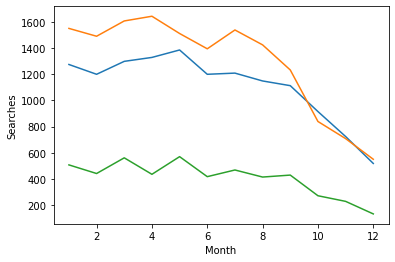

In [30]:
file2 = '/home/dsc/Documents/Data Science Challenge/searches.csv.bz2'
df=pd.read_csv(file2,delimiter='^',nrows=1e6,usecols=['Date','Destination'])
pd.set_option('display.max_columns', None)
df.dtypes


import seaborn as sns
import matplotlib.pyplot as plt

best_columns = [x.replace(' ',"") for x in df.columns]
df.columns = list(best_columns)

df['Date'] = pd.to_datetime(df['Date'],errors='coerce',yearfirst=True)
df['Month'] = df['Date'].dt.month
Dest = ['MAD','BCN','AGP']
df=df[df['Destination'].isin(['MAD','BCN','AGP'])]
del df['Date']

#plt.plot(mad_filter['Month'],mad_filter['Destination']);
#sns.lineplot(data=mad_filter,x='Month',y='Destination')
mad = df[df['Destination']=='MAD']
bcn = df[df['Destination']=='BCN']
apg = df[df['Destination']=='AGP']

plt.plot(mad.groupby(['Month']).count())
plt.plot(bcn.groupby(['Month']).count())
plt.plot(apg.groupby(['Month']).count())
plt.xlabel('Month')
plt.ylabel('Searches')

In [ ]:
#df=df[df['Destination']=='MAD'] 
#df2=df[df['Destination']=='BCN']
#df3=df[df['Destination']=='APG']
#filtered_df = filtered_df.groupby(['Month','Destination'])['Destination'].agg('count')

## Ex3 with chunks

<ipython-input-74-f7eae921f2c2>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'],errors='coerce',yearfirst=True)
<ipython-input-74-f7eae921f2c2>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month
<ipython-input-74-f7eae921f2c2>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

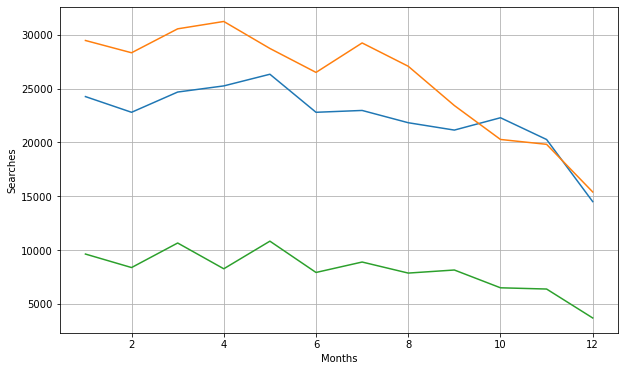

In [74]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

file2 = '/home/dsc/Documents/Data Science Challenge/searches.csv'
pd.set_option('display.max_columns', None)
dfchunk=pd.read_csv(file2,delimiter='^',chunksize=1e6,iterator=True,usecols=['Date','Destination'])
all_chunks = pd.DataFrame()

fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)

dest = ['MAD','BCN','AGP']

for city in dest:
    
    for i,b in enumerate(dfchunk):
        df=b
        df=df.dropna()
        df['Date'] = pd.to_datetime(df['Date'],errors='coerce',yearfirst=True)
        df['Month'] = df['Date'].dt.month
        del df['Date']
        all_chunks = all_chunks.append(df)
        
    df2 = all_chunks[all_chunks['Destination']==city]
    df3 = df2.groupby(['Month']).count().reset_index()
    #df3.plot(x='Month',y='Destination',label=city,ax=ax)
    plt.plot(df3['Month'],df3['Destination'],label=city)

ax.set_xlabel('Months')   
ax.set_ylabel('Searches')
plt.grid('on')

        

              

## Exercise 4

### Match searches with bookings.
### For every search in the searches file, find out whether the search ended up in a booking or not (using the info in the bookings file). 
### For instance, search and booking origin and destination should match.
### For the bookings file, origin and destination are the columns dep_port and arr_port, respectively.
### Generate a CSV file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.

## Ex 4

In [127]:
file1 = '/home/dsc/Data/challenge/searches.csv'
file2 = '/home/dsc/Data/challenge/bookings.csv'
pd.set_option('display.max_columns', None)

df1=pd.read_csv(file1,nrows = 9999, delimiter='^')
df2=pd.read_csv(file2,nrows = 9999, delimiter='^')
!pwd


/home/dsc/Documents/Data Science Challenge


### Generate new files without duplicates

In [33]:
#generate new files without duplicates

import subprocess as sp

def generate_uniques_file(from_file):
    new_path = from_file[:from_file.find('.')] + '_unique.csv'
    with open(new_path, mode='w', newline='\n') as f:
        head = sp.Popen(['head','-n', '1', from_file],stdout=f)
        head.wait()
        pros = sp.Popen(['tail','-n', '+2', from_file],stdout=sp.PIPE)
        pros_2 = sp.Popen(['sort','-u'], stdin=pros.stdout, stdout=f)
        pros_2.wait()


    return new_path
generate_uniques_file(file2)

'/home/dsc/Data/challenge/bookings_unique.csv'

### Load files without duplicates

In [1]:
import pandas as pd
file1 = '/home/dsc/Data/challenge/bookings_unique.csv'
file2 = '/home/dsc/Data/challenge/searches_unique.csv'
pd.set_option('display.max_columns', None)

import pandas as pd
b=pd.read_csv(file1, sep='^')
s=pd.read_csv(file2, sep='^', low_memory=False)



/home/dsc/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7,8,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
print(b.shape)
b.drop_duplicates(inplace=True)
print(b.shape)


(1000003, 38)
(1000003, 38)


### Cleaning columns

In [3]:
#.columns=[x.replace(" ","").lower() for x in b]
#b.applymap(lambda x: x.strip() if isinstance(x, str) else x)
b.columns=b.columns.str.strip()
b.arr_port=b.arr_port.str.strip()
b.dep_port=b.dep_port.str.strip()

### Trim date columns in both dataframes in order to have the same lenght to compare.

In [4]:
b.act_date=b.act_date.str[0:10]
s.Date=s.Date.str[0:10]

### Indicator that allow us to filter after the merge.

In [5]:
b['Booked']=1

In [18]:
b=b.filter(items=['act_date', 'dep_port', 'arr_port','Booked'])

In [21]:
s_b=s.merge(b,
            how='left', 
            left_on=['Date', 'Origin', 'Destination'],
            right_on=['act_date', 'dep_port', 'arr_port'])

s_b['Booked']=s_b['Booked'].fillna(0)
s_b.drop(['act_date', 'dep_port', 'arr_port'], axis=1, inplace=True)
s_b=s_b.astype({'Booked':int})
s_b[ s_b['Booked']==1 ].sample(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,Booked
328237,2013-10-30,17:12:55,CAL,7da60d9e60a322d3fff7e00cb62baa53,BR,BSB,MCO,1.0,2.0,BSB,MCO,2014-04-26,TT,NaN,MCO,BSB,2014-05-08,TT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0,1
145280,2013-05-07,14:56:36,MPT,6b7e05cdeedd0cef2dc034f7d43a4451,US,CGK,KUL,1.0,2.0,CGK,KUL,2013-05-16,NaN,NaN,KUL,CGK,2013-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,LAX,1
2906,2013-01-03,10:55:33,FCP,3565e31495ecfd46fa018339d20382b1,SA,RUH,JED,0.0,1.0,RUH,JED,2013-01-16,KP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,JED,1
66550,2013-02-25,23:04:56,FXR,5e50ab28331c9efc6ec536f59d66b309,SV,UIO,JFK,1.0,2.0,UIO,JFK,2013-03-25,VC,C,JFK,UIO,2013-04-01,VC,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d4bebb7105fcf01b72b786fbd4e02eb6,SAL,1
14555,2013-01-12,13:38:55,FFP,9530f0a7e694bc9402885b4fa7e094bd,TR,DMM,ISB,1.0,2.0,DMM,ISB,2013-04-11,EU,NaN,ISB,DMM,2013-04-21,EU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,IST,1


In [10]:
s_b[s_b['Booked']==1]

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,Booked
1,2013-01-01,00:03:11,MTP,80aa8dcb9192e6abd723fb68bf7a5674,IL,TLV,JFK,0.0,1.0,TLV,JFK,2013-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,TLV,1
2,2013-01-01,00:03:11,MTP,80aa8dcb9192e6abd723fb68bf7a5674,IL,TLV,JFK,0.0,1.0,TLV,JFK,2013-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,TLV,1
3,2013-01-01,00:03:11,MTP,80aa8dcb9192e6abd723fb68bf7a5674,IL,TLV,JFK,0.0,1.0,TLV,JFK,2013-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,TLV,1
4,2013-01-01,00:03:11,MTP,80aa8dcb9192e6abd723fb68bf7a5674,IL,TLV,JFK,0.0,1.0,TLV,JFK,2013-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,TLV,1
22,2013-01-01,00:41:22,MPT,3338ec096d4899b7b3a4961e12fdd499,AU,MEL,SYD,0.0,1.0,MEL,SYD,2013-04-16,BP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SYD,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386318,2013-12-25,20:23:54,MPT,8a920c89312c383c860f9faf2e693b84,IT,MAN,LHE,1.0,2.0,MAN,LHE,2014-02-28,NaN,NaN,LHE,MAN,2014-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0,1
386319,2013-12-25,20:23:54,MPT,8a920c89312c383c860f9faf2e693b84,IT,MAN,LHE,1.0,2.0,MAN,LHE,2014-02-28,NaN,NaN,LHE,MAN,2014-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0,1
386433,2013-12-25,22:30:12,MPT,e41c9d833aa74600552f2ed688b67d81,AT,VIE,IST,1.0,2.0,VIE,IST,2014-03-01,L6,NaN,IST,VIE,2014-03-15,L6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0,1
386434,2013-12-25,22:30:12,MPT,e41c9d833aa74600552f2ed688b67d81,AT,VIE,IST,1.0,2.0,VIE,IST,2014-03-01,L6,NaN,IST,VIE,2014-03-15,L6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0,1


In [16]:
b.shape

(1000003, 4)

In [15]:
s.shape

(359004, 45)

In [14]:
s_b.shape

(386515, 46)

### Save as Csv

In [11]:
s_b.to_csv('s_b_merge.csv',sep='^')